<a href="https://colab.research.google.com/github/sinchanaprabhakar/Design-and-Analysis-of-Algorithms-CSCI-6212-12/blob/main/DAA_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Installing libraries that don't exist
%pip install --quiet numpy pandas matplotlib scipy pytest

In [26]:
# Importing
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [27]:
# Algorithm implementation

def run_algorithm_counts_and_time(n: int):
    n = int(n)
    op_count = 0
    start = time.perf_counter()

    j = 5.0
    ln_n = math.log(n)
    # outer loop runs while j < log n
    while j < ln_n:
        k = 5.0
        while k < n:
            op_count += 1  # For counting operations
            k = k ** 1.5
        j = 1.2 * j

    elapsed = time.perf_counter() - start
    return op_count, elapsed


In [28]:
# Running for different n values

ns = [int(1e6), int(1e8), int(1e10), int(1e12), int(1e14), int(1e16), int(1e18)]
trials = 5  # number of repeats

rows = []
for n in ns:
    times = []
    ops = []
    for t in range(trials):
        op_count, elapsed = run_algorithm_counts_and_time(n)
        times.append(elapsed)
        ops.append(op_count)
    rows.append({
        "n": n,
        "log_n": math.log(n),
        "op_count_mean": np.mean(ops),  # Experimental Value
        "op_count_std": np.std(ops),
        "time_mean": np.mean(times),
        "time_std": np.std(times),
        "theoretical": (math.log(math.log(n)))**2 if n>math.e else float('nan'),  # Theoretical value
        "theoretical x C": (math.log(math.log(n)))**2 * 6.50613 if n>math.e else float('nan')  # C = Scaling constant = 6.50613
    })

df = pd.DataFrame(rows)
df


,n,log_n,op_count_mean,op_count_std,time_mean,time_std,theoretical,theoretical x C
0,1000000,13.815511,36.0,0.0,0.000006,3.653865e-06,6.894783,44.858356
1,100000000,18.420681,56.0,0.0,0.000007,6.854196e-07,8.488331,55.226183
2,10000000000,23.025851,63.0,0.0,0.000010,4.594849e-07,9.838370,64.009711
3,1000000000000,27.631021,80.0,0.0,0.000088,1.333866e-04,11.015357,71.667343
4,100000000000000,32.236191,88.0,0.0,0.000014,4.286813e-07,12.062353,78.479234
5,10000000000000000,36.841361,88.0,0.0,0.000010,2.899717e-07,13.007716,84.629893
6,1000000000000000000,41.446532,108.0,0.0,0.000013,7.367199e-07,13.871187,90.247744


Fitted scaling constant C = 7.01779


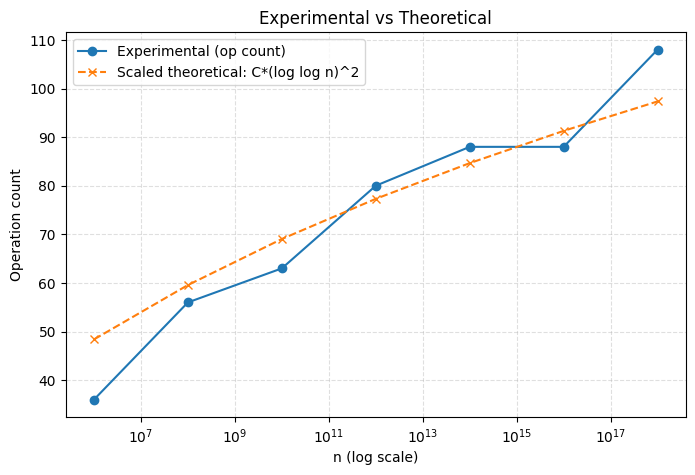

In [29]:
# Fitting a scaling constant C
# op_count_mean used as it's less noisy than time.

# remove null and negative theoretical values
mask = df['theoretical'].notna() & (df['theoretical'] > 0)
x = df.loc[mask, 'theoretical'].values
y = df.loc[mask, 'op_count_mean'].values

# Fitting C minimizing
C_hat = np.sum(x*y) / np.sum(x*x)

print(f"Fitted scaling constant C = {C_hat:.6g}")

# Plotting experimental (op_count) vs theoretical graph:
plt.figure(figsize=(8,5))
plt.plot(df['n'], df['op_count_mean'], marker='o', label='Experimental (op count)')
plt.plot(df['n'][mask], C_hat * df['theoretical'][mask], marker='x', linestyle='--', label=f'Scaled theoretical: C*(log log n)^2')
plt.xscale('log')   # plot n on log scale
plt.xlabel('n (log scale)')
plt.ylabel('Operation count')
plt.title('Experimental vs Theoretical')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.show()

